# K Nearest Neighbors - Projeto - prever a idade das lesmas do mar

Dataset: https://archive.ics.uci.edu/ml/datasets/abalone

Informações do conjunto de dados:
Prever a idade do abalone a partir de medições físicas. A idade do abalone é determinada cortando a concha através docone, colorindo-o e contando o número de anéis através de um microscópio - uma tarefa enfadonha e demorada. Outras medidas, mais fáceis de obter, são utilizadas para prever a idade. Mais informações, como padrões climáticos e localização (portanto, disponibilidade de alimentos) podem ser necessárias para resolver o problema.

Dos dados originais, os exemplos com valores ausentes foram removidos (a maioria tendo o valor predito ausente) e os intervalos dos valores contínuos foram escalados para uso com uma ANN (dividindo por 200).

## Informação de Atributo:

É fornecido o nome do atributo, o tipo de atributo, a unidade de medida e uma breve descrição. O número de toques é o valor a prever: seja como um valor contínuo ou como um problema de classificação.

Nome / Tipo de dados / Unidade de medida / Descrição
-----------------------------
Sexo / nominal / - / M, F e I (infantil)

Comprimento / contínuo / mm / Medida de casca mais longa
Diâmetro / contínua / mm / perpendicular ao comprimento
Altura / contínua / mm / com carne na casca
Peso inteiro / contínuo / gramas / abalone inteiro
Peso descascado / contínuo / gramas / peso de
Peso das vísceras da carne / contínuo / gramas / peso intestinal (após sangramento)
Peso da casca / contínuo / gramas / após secagem
Toques / inteiro / - / +1,5 fornece a idade em anos.

O arquivo leia-me contém estatísticas de atributos.

# A variável de destino deste exercício é Ring

# Bibliotecas

In [109]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split


from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report,confusion_matrix

from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import BaggingRegressor


from sklearn.metrics import mean_squared_error
from math import sqrt


# Testes
from sklearn.metrics import mean_squared_error
from sklearn import metrics
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import r2_score

## Obtenha os dados
** Leia o arquivo csv 'KNN_Project_Data' em um DataFrame **

In [4]:
abalone = pd.read_csv('Dados_abalone/abalone.data', header=None)

** Verifique o cabeçalho do DataFrame.**

In [10]:
abalone.head(20)

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7
5,I,0.425,0.300,0.095,0.3515,0.1410,0.0775,0.120,8
6,F,0.530,0.415,0.150,0.7775,0.2370,0.1415,0.330,20
7,F,0.545,0.425,0.125,0.7680,0.2940,0.1495,0.260,16
8,M,0.475,0.370,0.125,0.5095,0.2165,0.1125,0.165,9
9,F,0.550,0.440,0.150,0.8945,0.3145,0.1510,0.320,19


# Análise exploratória de dados

In [7]:
abalone.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       4177 non-null   object 
 1   1       4177 non-null   float64
 2   2       4177 non-null   float64
 3   3       4177 non-null   float64
 4   4       4177 non-null   float64
 5   5       4177 non-null   float64
 6   6       4177 non-null   float64
 7   7       4177 non-null   float64
 8   8       4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


# Nomeando as colunas

In [8]:
abalone.columns = [
"Sex",
"Length",
"Diameter",
"Height",
"Whole weight",
"Shucked weight",
"Viscera weight",
"Shell weight",
"Rings",
]

In [9]:
abalone.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


## Podemos remover a coluna 'Sex' já que possu valores categorigos, mas iremos transformar em valores numericos

DataFrame com variáveis dummy para colunas categóricas

In [20]:
df1 = abalone.drop('Sex',axis=1)

In [21]:
df1.head()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [15]:
Sex_abalone = abalone['Sex']

In [16]:
Sex_abalone_dummy = pd.get_dummies(Sex_abalone)


In [17]:
Sex_abalone_dummy.head()

,F,I,M
0,0,0,1
1,0,0,1
2,1,0,0
3,0,0,1
4,0,1,0


In [26]:
Sex_abalone_dummy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   F       4177 non-null   uint8
 1   I       4177 non-null   uint8
 2   M       4177 non-null   uint8
dtypes: uint8(3)
memory usage: 12.4 KB


In [35]:
df2 = df1.join(Sex_abalone_dummy,lsuffix='_x',rsuffix='_y')

In [36]:
df2.head()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings,F,I,M
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15,0,0,1
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7,0,0,1
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9,1,0,0
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10,0,0,1
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7,0,1,0


# Modificando novamente o nome do datafreme

In [37]:
abalone_tratado = df2

Podemos notar no pairplot que existe muitos padros entre os dados, alguns com tendencias lineares e outros como y = raiz(x)

<img src = Dados_abalone\raiz_de_x.png>

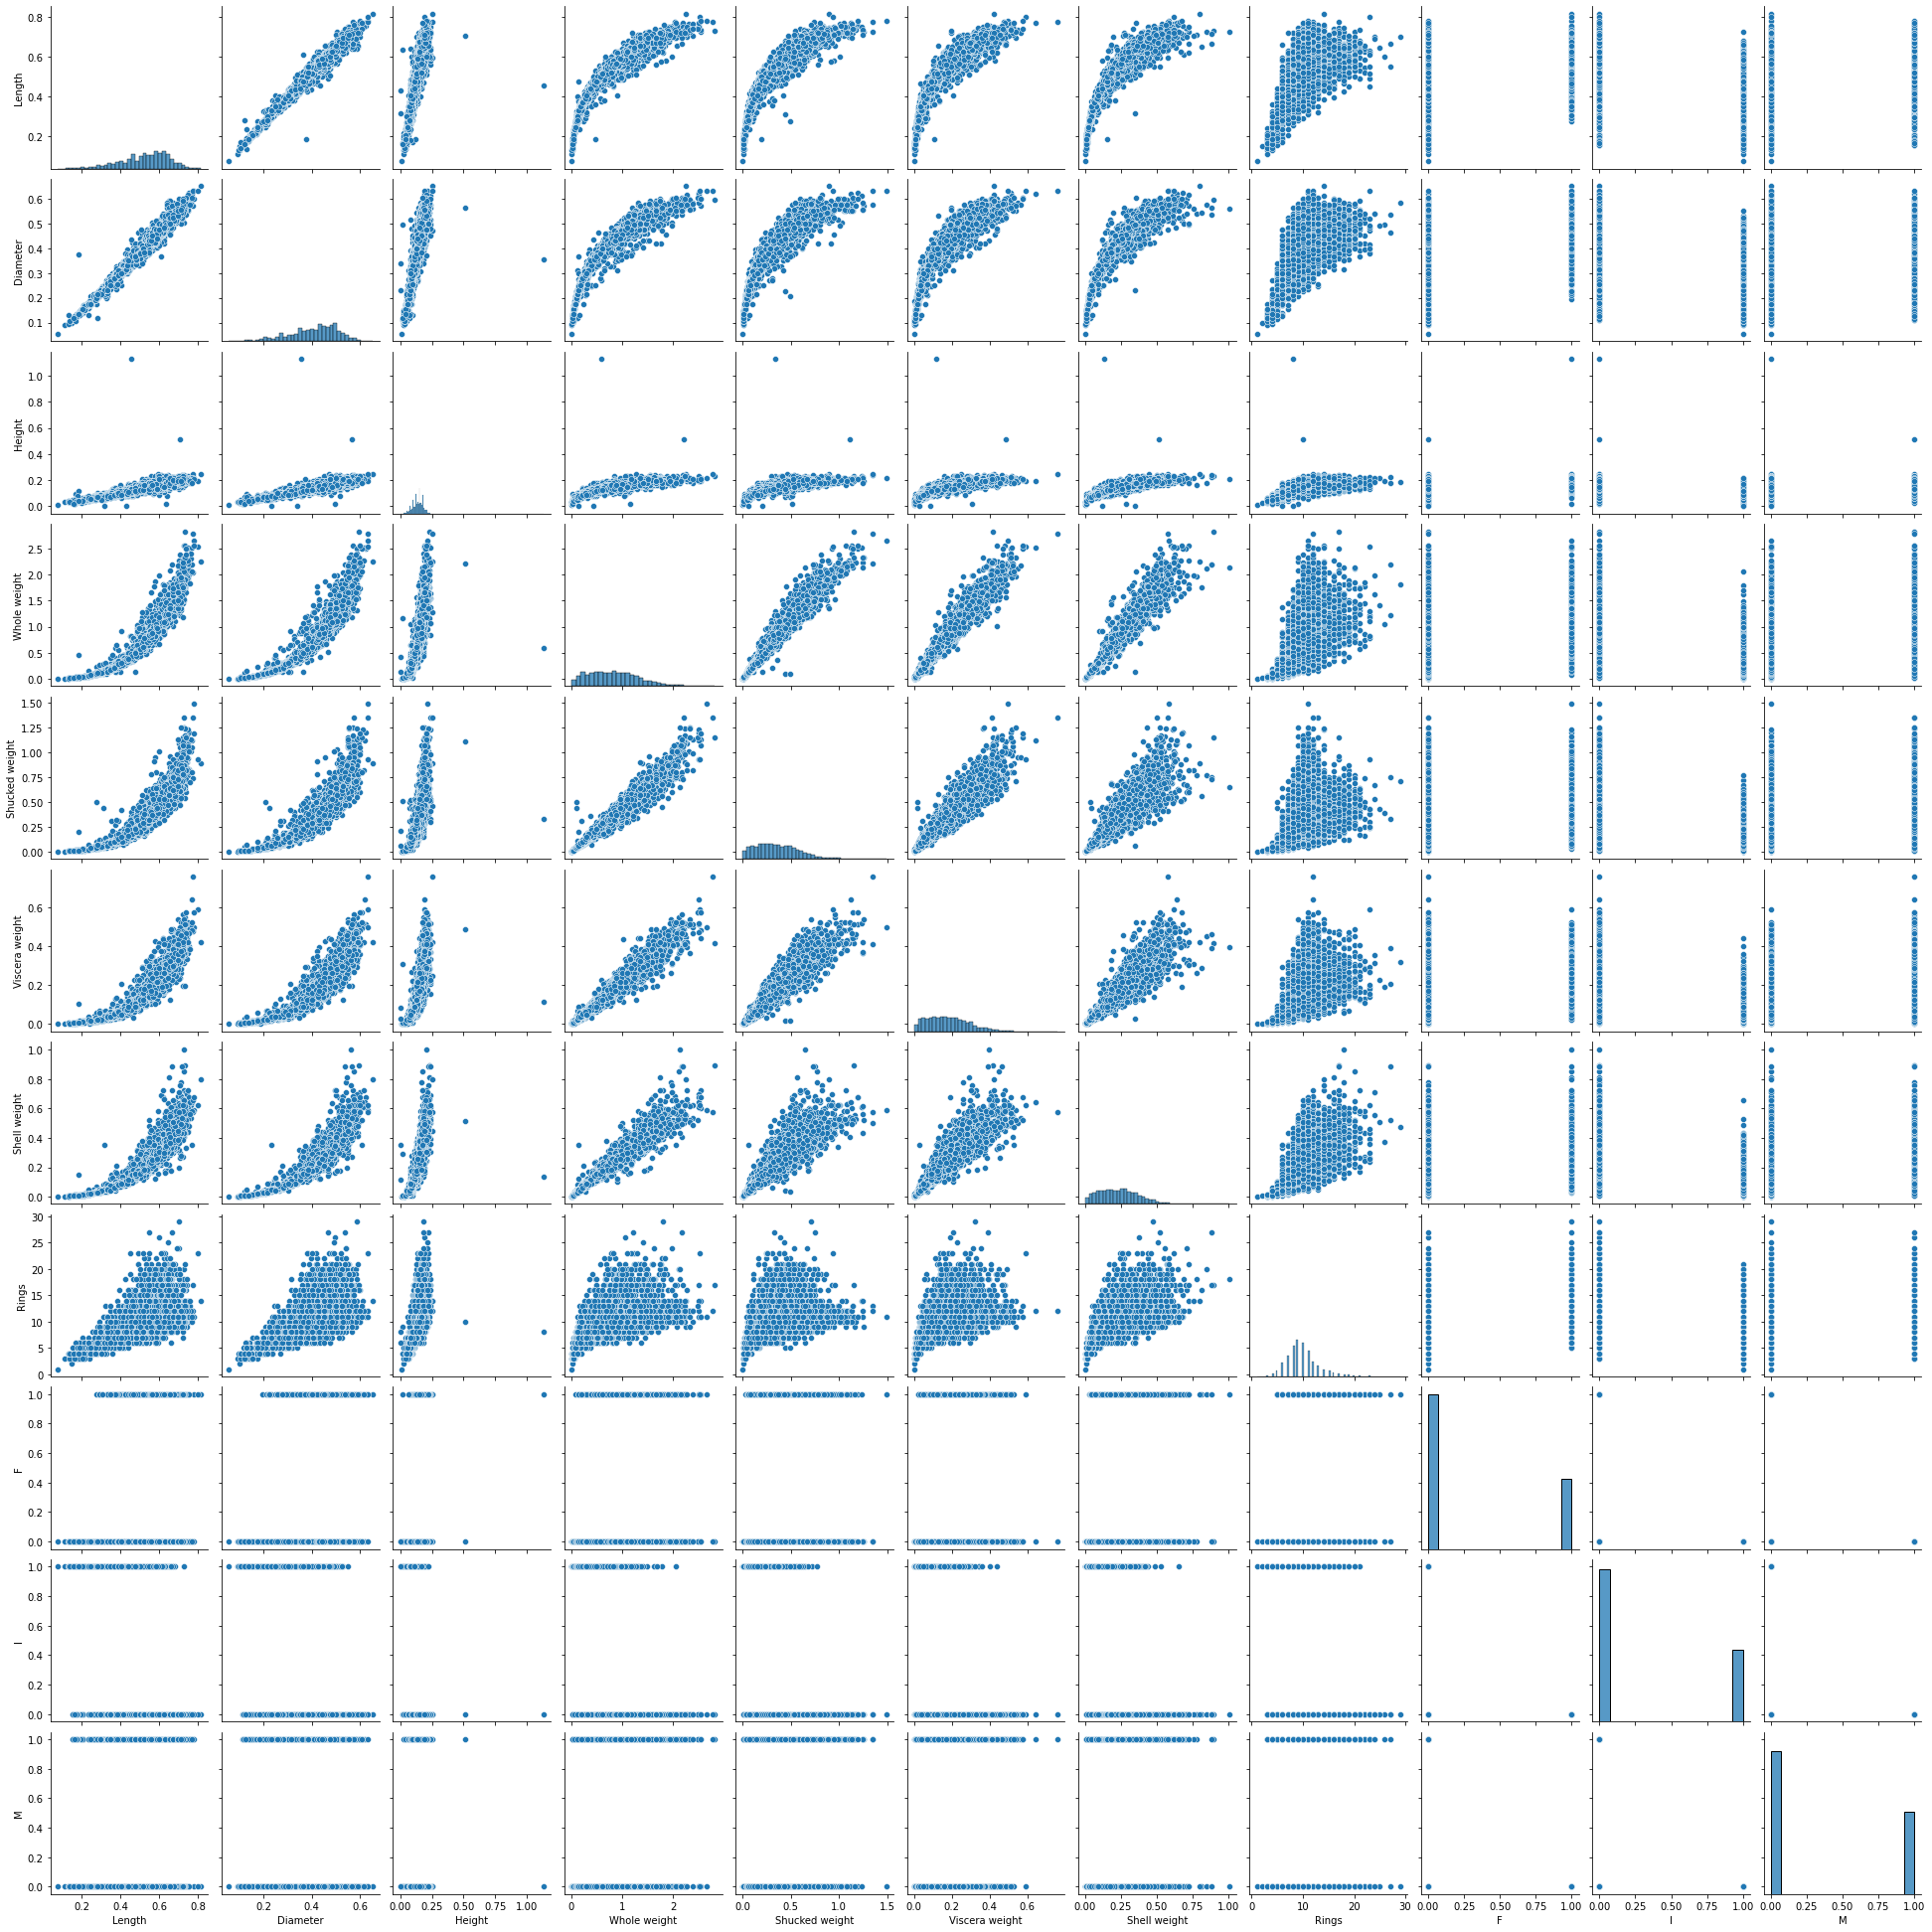

In [40]:
sns.pairplot(abalone_tratado)

## Teste de correlção
quanto mais próximo de 1 melhor

In [45]:
correlation_matrix = abalone_tratado.corr()
correlation_matrix["Rings"]

Length            0.556720
Diameter          0.574660
Height            0.557467
Whole weight      0.540390
Shucked weight    0.420884
Viscera weight    0.503819
Shell weight      0.627574
Rings             1.000000
F                 0.250279
I                -0.436063
M                 0.181831
Name: Rings, dtype: float64

# Podemos observar que o conjunto de dados tem entre cinco e quinze anéis

<AxesSubplot:xlabel='Rings', ylabel='Count'>

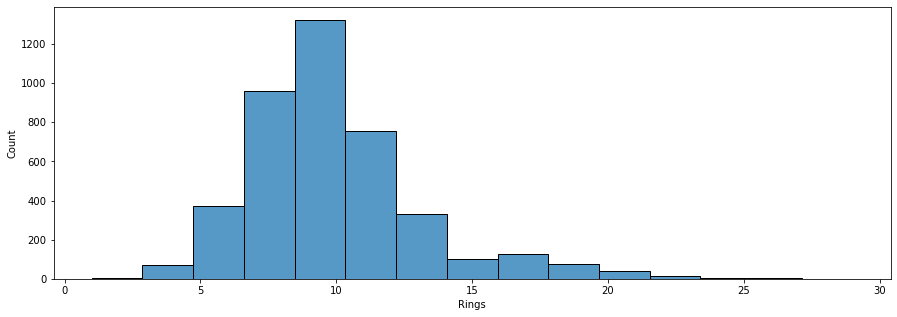

In [44]:
plt.figure(figsize=(15,5))
sns.histplot(data=abalone_tratado,x='Rings',bins=15)


# Obtendo variaveis independentes

In [47]:
X = abalone_tratado.drop('Rings',axis=1)

In [48]:
X = X.values

In [49]:
y = abalone_tratado["Rings"]

In [50]:
y = y.values

# Divisão treino-teste

** Use o método train_test_split para dividir seus dados em um conjunto treino e teste.**

In [52]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=12345)

# test_size 0,2 -> terá 20% dados originais, deixando os outros 80% dados de treinamento.
# O random_state é um parâmetro que permite obter os mesmos resultados sempre que o código é executado

Ajustando o KNN para a regressão

In [54]:
from sklearn.neighbors import KNeighborsRegressor

In [55]:
knn_model = KNeighborsRegressor(n_neighbors=3)


# Treinando o modelo

In [57]:
knn_model.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=3)

# Previsões e avaliações
Vamos avaliar o nosso modelo KNN!

### Previsão nos dados de treinamento

In [71]:
train_preds = knn_model.predict(X_train)

In [76]:
df_train_preds = pd.DataFrame(train_preds,columns=['Predict_train'])
df_train_preds.head()

,Predict_train
0,10.333333
1,14.333333
2,12.000000
3,7.333333
4,12.666667


In [60]:
mse = mean_squared_error(y_train, train_preds)
rmse = sqrt(mse)
rmse

1.6594676408743605

## Desempenho preditivo no conjunto de teste

In [77]:
test_preds = knn_model.predict(X_test)
df_test_preds = pd.DataFrame(test_preds,columns=['Predict_test'])
df_test_preds.head()

,Predict_test
0,15.000000
1,12.000000
2,9.333333
3,10.333333
4,9.000000


In [74]:
mse = mean_squared_error(y_test, test_preds)
rmse = sqrt(mse)
rmse

2.419188312082008

### método 1 - Encontrando o melhor valor de K

In [81]:
parameters = {"n_neighbors": range(1, 50)}
gridsearch = GridSearchCV(KNeighborsRegressor(), parameters)
gridsearch.fit(X_train, y_train)
GridSearchCV(estimator=KNeighborsRegressor(),
             param_grid={'n_neighbors': range(1, 50),
                         'weights': ['uniform', 'distance']})

GridSearchCV(estimator=KNeighborsRegressor(),
             param_grid={'n_neighbors': range(1, 50),
                         'weights': ['uniform', 'distance']})

In [82]:
gridsearch.best_params_

{'n_neighbors': 14}

In [83]:
train_preds_grid = gridsearch.predict(X_train)
train_mse = mean_squared_error(y_train, train_preds_grid)
train_rmse = sqrt(train_mse)
test_preds_grid = gridsearch.predict(X_test)
test_mse = mean_squared_error(y_test, test_preds_grid)
test_rmse = sqrt(test_mse)
train_rmse

2.0329709043679967

In [84]:
test_rmse

2.256689704634992

## média ponderada

In [86]:
parameters = {
    "n_neighbors": range(1, 50),
    "weights": ["uniform", "distance"],}

gridsearch = GridSearchCV(KNeighborsRegressor(), parameters)
gridsearch.fit(X_train, y_train)

GridSearchCV(estimator=KNeighborsRegressor(), param_grid={'n_neighbors': range(1, 50), 'weights': ['uniform', 'distance']})




GridSearchCV(estimator=KNeighborsRegressor(),
             param_grid={'n_neighbors': range(1, 50),
                         'weights': ['uniform', 'distance']})

In [87]:

gridsearch.best_params_

{'n_neighbors': 14, 'weights': 'distance'}

In [88]:
test_preds_grid = gridsearch.predict(X_test)
test_mse = mean_squared_error(y_test, test_preds_grid)
test_rmse = sqrt(test_mse)
test_rmse

2.2446956071694957

#### houve uma melhora no erro, mas não foi relevante

## Método Bagging para melhorar a performase do modelo

In [90]:
best_k = gridsearch.best_params_["n_neighbors"]
best_weights = gridsearch.best_params_["weights"]

In [91]:
bagged_knn = KNeighborsRegressor(n_neighbors=best_k, weights=best_weights)

### crie uma nova instância com 100 estimadores usando o bagged_knnmodelo

In [96]:
bagging_model = BaggingRegressor(bagged_knn, n_estimators=100)

In [98]:
bagging_model.fit(X_train, y_train)

BaggingRegressor(base_estimator=KNeighborsRegressor(n_neighbors=14,
                                                    weights='distance'),
                 n_estimators=100)

In [99]:
test_preds_grid = bagging_model.predict(X_test)


In [100]:
test_mse = mean_squared_error(y_test, test_preds_grid)
test_rmse = sqrt(test_mse)
test_rmse

2.2396157709357594

## Testando outros métodos

In [78]:
error_rate = []

# Will take some time
for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

# saber corretamente o valor do fator "K"

Text(0, 0.5, 'Error Rate')

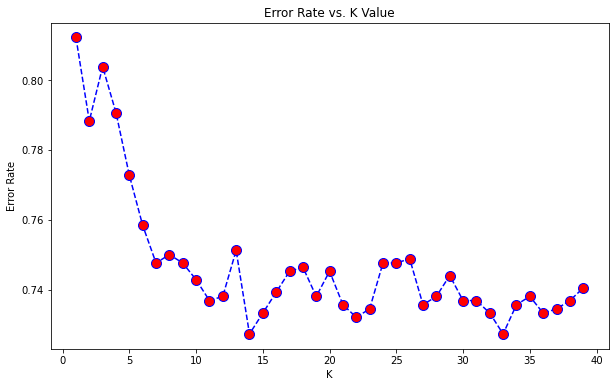

In [79]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

# Semelhando ao método 1, podemos verificar que o melhor valor de k é o 14 ou talvez o 33

## Treine seu modelo novamente com novo valor K

** Treine novamente seu modelo com o melhor valor K (até você para decidir o que deseja) e re-faça o relatório de classificação e a matriz de confusão. **

In [103]:
# NOW WITH K=30
knn = KNeighborsRegressor(n_neighbors=30)

In [104]:
knn.fit(X_train,y_train)


KNeighborsRegressor(n_neighbors=30)

In [105]:
pred = knn.predict(X_test)

In [106]:
print('WITH K=14')
print('\n')


WITH K=14




# MSE e o MAE, quanto menor o valor, mais preciso seria o modelo de regressão
### exemplo, ter um MAPE=12% significa que, em média, nosso modelo faz previsões que erram por 12% do valor real

In [115]:
print('RMSE:', np.sqrt(metrics.mean_squared_error(pred,y_test)))
print('MAE:', metrics.mean_absolute_error(pred,y_test))
print('MSE:', metrics.mean_squared_error(pred,y_test))
print('RMSE:', np.sqrt(metrics.mean_squared_error(pred,y_test)))
print('MAPE', mean_absolute_percentage_error(pred,y_test)*100,'%')

RMSE: 2.2597570357700816
MAE: 1.5435406698564595
MSE: 5.106501860712386
RMSE: 2.2597570357700816
MAPE 15.435981860084484 %


In [117]:
print('RMSE com Bagging :', np.sqrt(metrics.mean_squared_error(test_preds_grid,y_test)))


RMSE com Bagging : 2.2396157709357594


Vantagens e  MAE
Pelo fato de não elevar as diferenças ao quadrado, essa medida torna-se uma opção não tão ideal para lidar com problemas delicados. Contudo, é uma métrica sólida para modelos que devem prever muitos dados ou dados sazonais, como em previsões de números de casos de doenças, nas quais prever a tendência e sazonalidade dos números é mais importante do que os valores absolutos de cada di

https://medium.com/turing-talks/como-avaliar-seu-modelo-de-regress%C3%A3o-c2c8d73dab96